<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


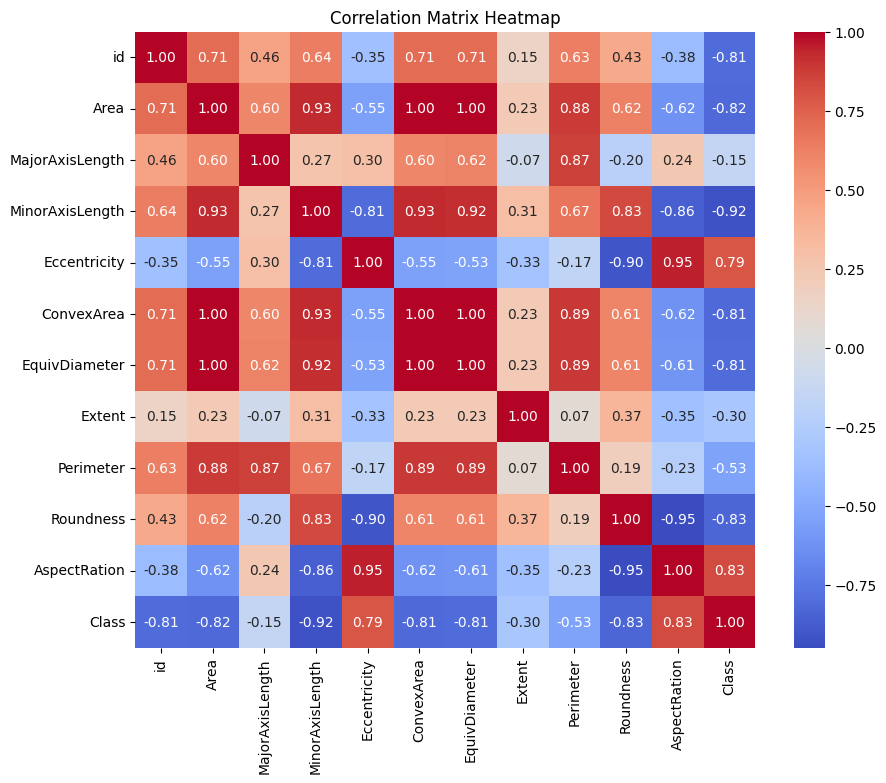

Epoch 1/100
1364/1364 [==============================] - 10s 6ms/step - loss: 0.3484 - accuracy: 0.9020
Epoch 2/100
1364/1364 [==============================] - 23s 17ms/step - loss: 0.1482 - accuracy: 0.9804
Epoch 3/100
1364/1364 [==============================] - 11s 8ms/step - loss: 0.0903 - accuracy: 0.9849
Epoch 4/100
1364/1364 [==============================] - 10s 7ms/step - loss: 0.0665 - accuracy: 0.9858
Epoch 5/100
1364/1364 [==============================] - 9s 7ms/step - loss: 0.0555 - accuracy: 0.9862
Epoch 6/100
1364/1364 [==============================] - 10s 7ms/step - loss: 0.0501 - accuracy: 0.9869
Epoch 7/100
1364/1364 [==============================] - 7s 5ms/step - loss: 0.0473 - accuracy: 0.9865
Epoch 8/100
1364/1364 [==============================] - 10s 8ms/step - loss: 0.0456 - accuracy: 0.9860
Epoch 9/100
1364/1364 [==============================] - 16s 11ms/step - loss: 0.0445 - accuracy: 0.9861
Epoch 10/100
1364/1364 [==============================] - 12s 9m

In [2]:
# Importing the libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset for classification
dataset = pd.read_csv('riceClassification.csv')
dataset.info()

dataset.head()

# Calculating the correlation matrix
correlation_matrix = dataset.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

from sklearn.preprocessing import LabelEncoder

X = dataset.iloc[:, [1, 3]].values

# For Not Numeric Label
#y = LabelEncoder().fit_transform(dataset.iloc[:, 6].values)
y = dataset.iloc[:, 11].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Building the ANN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=2))

# Adding the second hidden layer
#classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size=10, epochs=100)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

from sklearn.metrics import accuracy_score

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)

# Menampilkan akurasi
print("Akurasi:", accuracy)
